In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import feather
%matplotlib inline
sns.set_style("ticks")
sns.set_context("notebook", font_scale=1.3)

In [2]:
with open('../_outputs/controls/_process_shops_durations.txt') as f:
    content = f.readlines()
    content = [x.strip() for x in content] # enlève les sauts de ligne
y = [float(item.split(':')[-1]) for item in content] # prend les secondes et mili secondes uniquement

In [3]:
max(y) # temps max sur les 5000 fichiers

5.511472

In [4]:
ymean = sum(y)/len(y) # moyenne sur les 5000 fichiers
ymean

2.2607502493999987

In [5]:
x = list(range(len(content))) # les relevés de temps sont dans l'ordre

In [6]:
df_5000 = pd.DataFrame(dict(x = x, y = y))

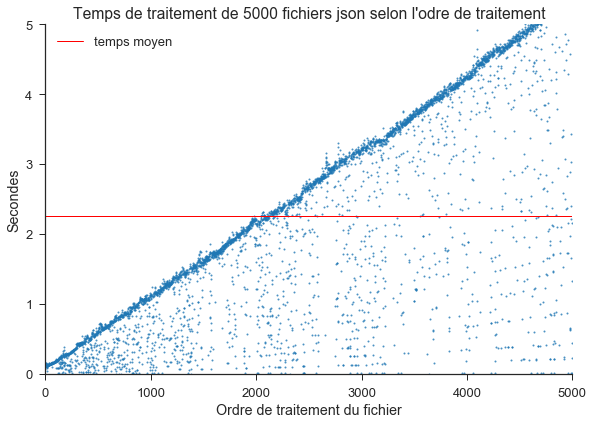

In [7]:
fg = sns.lmplot('x', 'y', data=df_5000, fit_reg=False, aspect=1.4, size=6, scatter_kws={"marker": "D", "s": 4})
fg.set(xlim=(0, 5000), ylim=(0,5))
fg.set_axis_labels(x_var='Ordre de traitement du fichier',y_var='Secondes')
plot = plt.title("Temps de traitement de 5000 fichiers json selon l'odre de traitement")
plt.axhline(y = ymean, linewidth=1, label='temps moyen', color='r');
plt.legend();

Chaque fichier a de 0 à 25 listings mais la plupart en ont 25. On voit une dégradation linéraire des performances en fonction du nombre de fichiers à triater. Avec plus de 50 000 fichiers cela représente des jours ... voir des semaines sur un macbook pro récent avec 16GO de ram ! Solution : faire des traitements par lots  de 250.
Pour relancer le processus automatiquement, faire en ligne de commande : 
> while true; do python nom_du_fichier.py; sleep 2; done

Intéropre par un ctrl-c

In [8]:
y_cum = np.cumsum(y) # temps cumulé sur les 5000 fichiers
y_cum

array([  6.31860000e-02,   1.59058000e-01,   2.90649000e-01, ...,
         1.13035201e+04,   1.13035267e+04,   1.13037512e+04])

In [9]:
y_mean = sum(y[:250])/250 # moyenne du temps par fichier sur les 250 premiers
y_mean

0.18216865200000013

In [10]:
y_mean_250 = [y_mean] * 5000
y_cum_250 = np.cumsum(y_mean_250)

In [11]:
df_250 = pd.DataFrame(dict(x = x, y_cum = y_cum, y_cum_250 = y_cum_250))

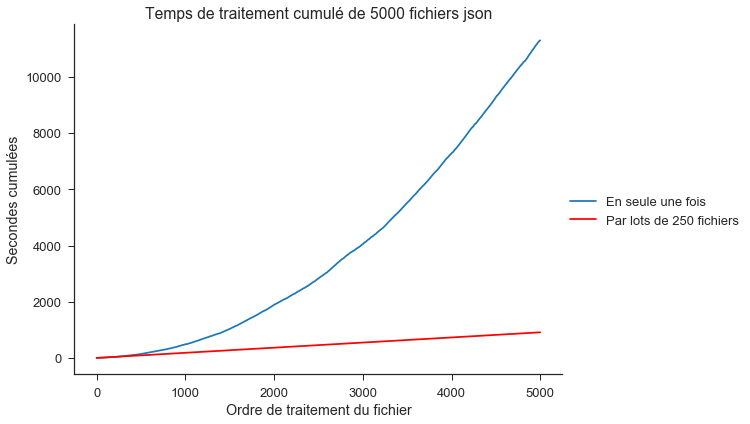

In [12]:
facet = sns.FacetGrid(df_250, aspect=1.4, size=6)
facet.map(plt.plot, "x", "y_cum", label="En seule une fois")
facet.map(plt.plot, "x", "y_cum_250", color='r', label="Par lots de 250 fichiers")
facet.set_axis_labels(x_var='Ordre de traitement du fichier',y_var='Secondes cumulées');
facet.add_legend()
plot = plt.title('Temps de traitement cumulé de 5000 fichiers json');